# The Sparks Foundation
## Exploratory Data Analysis
### Aim: Find out weak areas that can be improved to make more profit
## Name: Anyan Festus

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

In [2]:
# Reading the dataset
store_df = pd.read_csv('SampleSuperstore.csv')
store_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
#Changing the data type of the postal code
store_df['Postal Code'] = store_df['Postal Code'].astype(str)

In [4]:
# Getting information about the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [5]:
#Checking for missing values
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
# Since the shop is just in one location, we can drop the Country column
store_df = store_df.drop(columns='Country', axis=1)

In [8]:
# Looking out for duplicated rows
store_df.loc[store_df.duplicated()]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [9]:
#Dropping duplicated rows
store_df.drop_duplicates()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
#Descriptive statistics of the quantitative varables
store_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [24]:
# Separating Categorical variables from Quantitative variables
categorical_vars = store_df.select_dtypes(include=['object'])
categorical_vars.drop(columns = 'Postal Code', axis = 1, inplace = True)

In [25]:
# Statistical analysis of Categorical variables
categorical_vars.describe()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994
unique,4,3,531,49,4,3,17
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders
freq,5968,5191,915,2001,3203,6026,1523


# Univariate Analysis

## 1.1 Quantitative Variables

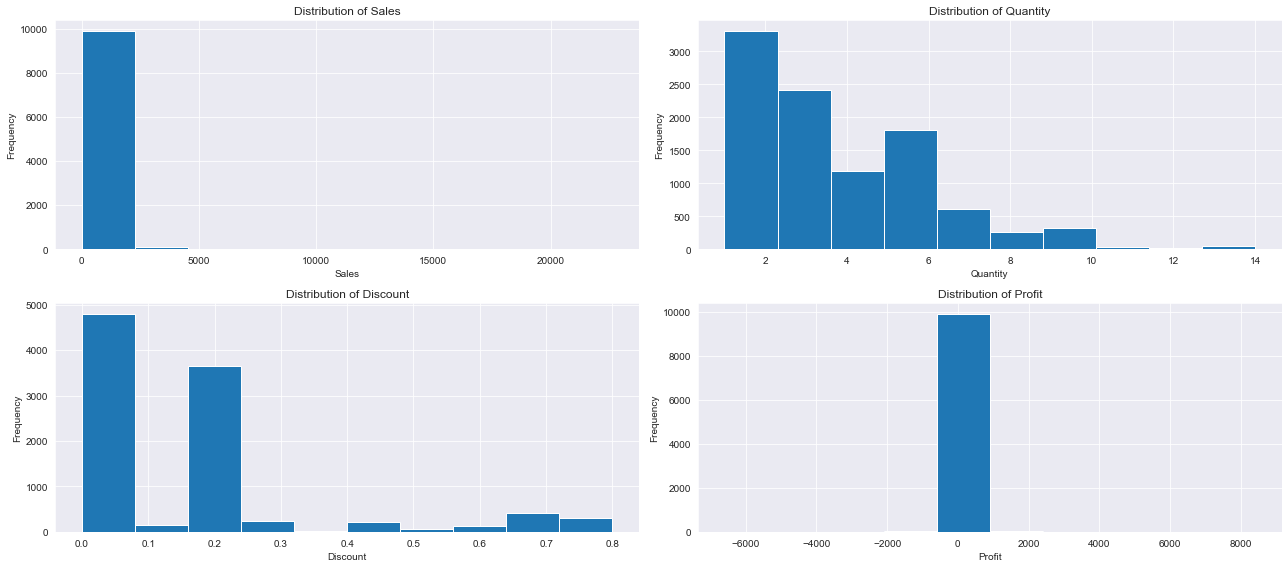

In [12]:
# Select only the quantitative variables
quantitative_vars = ['Sales', 'Quantity', 'Discount', 'Profit']
num_rows = 2
num_cols = (len(quantitative_vars) + 1) // 2

# Create the figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Reshape the axes array to handle different number of variables
axs = axs.ravel()

# Loop through the quantitative variables and plot on separate axes
for i, var in enumerate(quantitative_vars):
    ax = axs[i]
    ax.hist(store_df[var], bins=10)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {var}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [15]:
store_df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

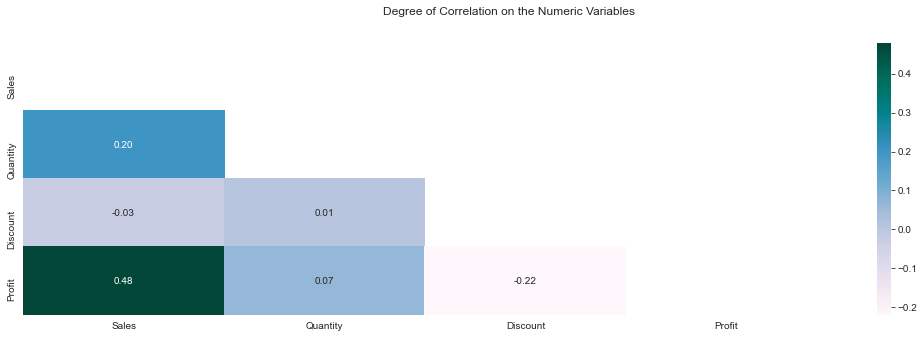

In [17]:
corr = store_df.corr()
plt.figure(figsize=(18, 5))
sns.heatmap(corr, annot=True, fmt=".2f", mask=np.triu(np.ones_like(store_df.corr(), dtype=bool)), cmap='PuBuGn')
plt.suptitle('Degree of Correlation on the Numeric Variables')
plt.show()

## 1.2 Categorical Variables

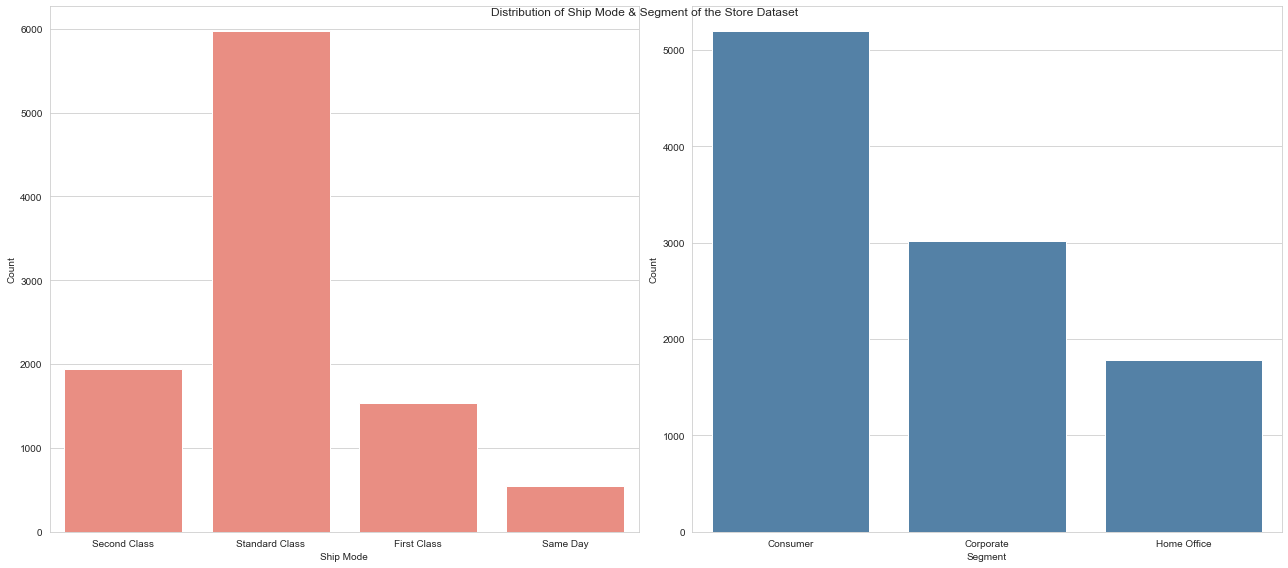

In [27]:
# Visualizing Ship Mode and Segment
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot countplot for Ship Mode
sns.countplot(data=store_df, x='Ship Mode', ax=axes[0], color='salmon')
axes[0].set_xlabel('Ship Mode')
axes[0].set_ylabel('Count')

# Plot countplot for Segment
sns.countplot(x='Segment', data=store_df, ax=axes[1], color='steelblue')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Count')

plt.suptitle('Distribution of Ship Mode & Segment of the Store Dataset')
plt.tight_layout()
plt.show()

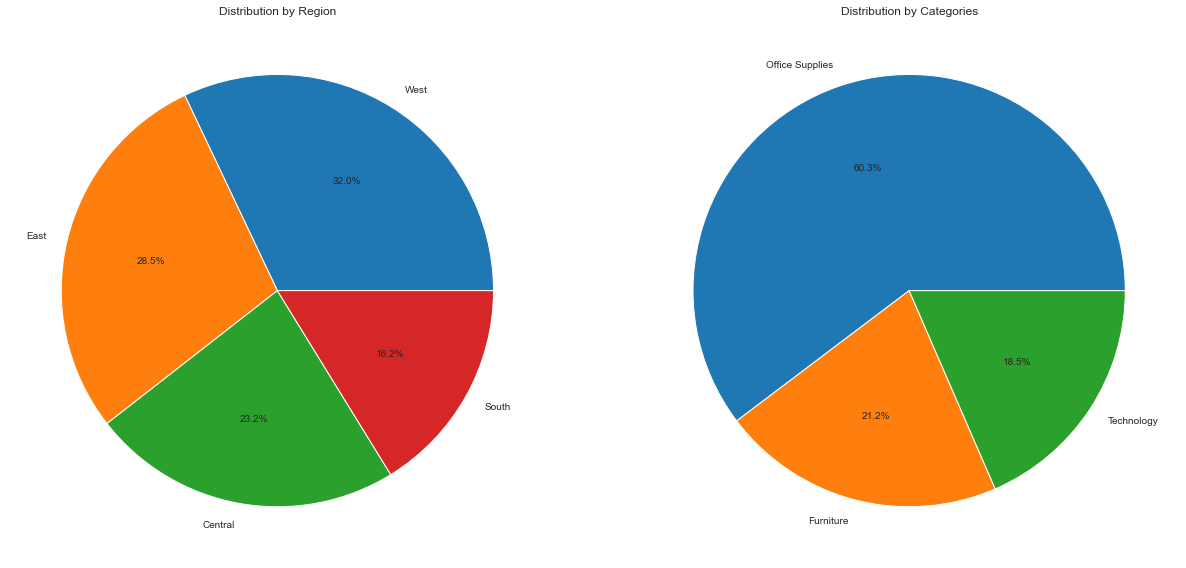

In [57]:
# Creating a Pie chart to know the distribution of regions
fig, axes = plt.subplots(1,2,figsize=(18, 8))
region_counts = store_df['Region'].value_counts()
axes[0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
axes[0].set_title('Distribution by Region');

axes[1].pie(store_df['Category'].value_counts(), labels = store_df['Category'].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Distribution by Categories');
plt.tight_layout()